In [2]:
import pandas as pd


Since there is no column names and index in the original data set, I use `wooldridge` python package to fetch crime1 data set. It's data set from wooldridge's introduction to econometrics textbook. 

More introduction about this package can be found [here]{https://pypi.org/project/wooldridge/}.

In [3]:
import wooldridge

In [4]:
crime = wooldridge.data('crime1')

In [5]:
crime.head()

,narr86,nfarr86,nparr86,pcnv,avgsen,tottime,ptime86,qemp86,inc86,durat,black,hispan,born60,pcnvsq,pt86sq,inc86sq
0,0,0,0,0.38,17.600000,35.200001,12,0.0,0.0,0.0,0,0,1,0.1444,144,0.000000
1,2,2,0,0.44,0.000000,0.000000,0,1.0,0.8,0.0,0,1,0,0.1936,0,0.640000
2,1,1,0,0.33,22.799999,22.799999,0,0.0,0.0,11.0,1,0,1,0.1089,0,0.000000
3,2,2,1,0.25,0.000000,0.000000,5,2.0,8.8,0.0,0,1,1,0.0625,25,77.440002
4,1,1,0,0.00,0.000000,0.000000,0,2.0,8.1,1.0,0,0,0,0.0000,0,65.610008


## Part1: Regularization

### 1
(1) Regress narr86 on pcnv, avgsen, ptime86, qemp86, inc86. Also include all squares and all interactions for those features.

(2) Finally, add the controls black and hispan. 

(3) Discuss what you learn from the output from this regression.

(4) Which variables are statistically significant?

(5) What is the regression $r^2$?

In [9]:
#(1): Simple OLS
import statsmodels.api as sm
import numpy as np



In [10]:
crime['qemp86sq']= crime['qemp86']*crime['qemp86']
crime['avgsensq']= crime['avgsen']* crime['avgsen']
crime['pcnavg']= crime['pcnv'] * crime['avgsen']
crime['pcnpti']=crime['pcnv'] *crime['ptime86']
crime['pcnqem']= crime['pcnv']*crime['qemp86']
crime['pcninc']= crime['pcnv']*crime['inc86']
crime['avgpti']= crime['avgsen']*crime['ptime86']
crime['avgqem']=crime['avgsen']*crime['qemp86']
crime['avginc']= crime['avgsen']*crime['inc86']
crime['ptiqem']=crime['ptime86']*crime['qemp86']
crime['ptiinc']= crime['ptime86']*crime['inc86']
crime['qeminc'] = crime['qemp86']*crime['inc86']

In [11]:
crime.head()

,narr86,nfarr86,nparr86,pcnv,avgsen,tottime,ptime86,qemp86,inc86,durat,...,pcnavg,pcnpti,pcnqem,pcninc,avgpti,avgqem,avginc,ptiqem,ptiinc,qeminc
0,0,0,0,0.38,17.600000,35.200001,12,0.0,0.0,0.0,...,6.688,4.56,0.00,0.000,211.200005,0.0,0.0,0.0,0.000000,0.000000
1,2,2,0,0.44,0.000000,0.000000,0,1.0,0.8,0.0,...,0.000,0.00,0.44,0.352,0.000000,0.0,0.0,0.0,0.000000,0.800000
2,1,1,0,0.33,22.799999,22.799999,0,0.0,0.0,11.0,...,7.524,0.00,0.00,0.000,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,2,2,1,0.25,0.000000,0.000000,5,2.0,8.8,0.0,...,0.000,1.25,0.50,2.200,0.000000,0.0,0.0,10.0,44.000001,17.600000
4,1,1,0,0.00,0.000000,0.000000,0,2.0,8.1,1.0,...,0.000,0.00,0.00,0.000,0.000000,0.0,0.0,0.0,0.000000,16.200001


In [12]:
print(crime.columns) #for copying the columns names easily

Index(['narr86', 'nfarr86', 'nparr86', 'pcnv', 'avgsen', 'tottime', 'ptime86',
       'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60', 'pcnvsq',
       'pt86sq', 'inc86sq', 'qemp86sq', 'avgsensq', 'pcnavg', 'pcnpti',
       'pcnqem', 'pcninc', 'avgpti', 'avgqem', 'avginc', 'ptiqem', 'ptiinc',
       'qeminc'],
      dtype='object')


In [40]:
X = crime[['pcnv','avgsen','ptime86','qemp86','inc86','pcnvsq',
       'pt86sq', 'inc86sq','qemp86sq', 'avgsensq', 'pcnavg', 'pcnpti',
       'pcnqem', 'pcninc', 'avgpti', 'avgqem', 'avginc', 'ptiqem', 'ptiinc',
       'qeminc']]
y = crime['narr86']
X = sm.add_constant(X)# add constant term. 
model = sm.OLS(y,X)
result = model.fit()

In [41]:
print(result.params)


const       0.552649
pcnv        0.633250
avgsen      0.004819
ptime86     0.324873
qemp86      0.173927
inc86      -0.011056
pcnvsq     -0.810280
pt86sq     -0.031513
inc86sq     0.000003
qemp86sq   -0.051785
avgsensq   -0.000214
pcnavg      0.018007
pcnpti     -0.012248
pcnqem     -0.031307
pcninc      0.000817
avgpti     -0.000954
avgqem     -0.000216
avginc     -0.000129
ptiqem      0.023528
ptiinc     -0.005667
qeminc      0.002268
dtype: float64


In [42]:
print('t values are:', result.tvalues)

t values are: const       12.268344
pcnv         3.796108
avgsen       0.335751
ptime86      5.494146
qemp86       2.983337
inc86       -4.245533
pcnvsq      -5.150078
pt86sq      -6.433606
inc86sq      0.993801
qemp86sq    -3.339710
avgsensq    -0.615373
pcnavg       0.951383
pcnpti      -0.382651
pcnqem      -0.875892
pcninc       1.037247
avgpti      -0.758298
avgqem      -0.044081
avginc      -0.753292
ptiqem       0.522195
ptiinc      -1.708728
qeminc       3.071304
dtype: float64


In [43]:
print('$R^2$ without black and hispan',result.rsquared)

$R^2$ without black and hispan 0.09346585509182115


In [52]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 narr86   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     13.94
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           6.05e-45
Time:                        15:03:00   Log-Likelihood:                -3318.5
No. Observations:                2725   AIC:                             6679.
Df Residuals:                    2704   BIC:                             6803.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5526      0.045     12.268      0.000       0.464       0.641
pcnv           0.6332      0.167      3.796      0.000       0.306       0.960
avgsen         0.0048      0.014      0.336      0.737      -0.023       0.033
ptime86        0.3249      0.059      5.494      0.000       0.209       0.441
qemp86         0.1739      0.058      2.983      0.003       0.060       0.288
inc86         -0.0111      0.003     -4.246      0.000      -0.016      -0.006
pcnvsq        -0.8103      0.157     -5.150      0.000      -1.119      -0.502
pt86sq        -0.0315      0.005     -6.434      0.000      -0.041      -0.022
inc86sq     2.896e-06   2.91e-06      0.994      0.320   -2.82e-06    8.61e-06
qemp86sq      -0.0518      0.016     -3.340      0.001      -0.082      -0.021
avgsensq      -0.0002      0.000     -0.615      0.538      -0.001       0.000
pcnavg         0.0180      0.019      0.951      0.341      -0.019       0.055
pcnpti        -0.0122      0.032     -0.383      0.702      -0.075       0.051
pcnqem        -0.0313      0.036     -0.876      0.381      -0.101       0.039
pcninc         0.0008      0.001      1.037      0.300      -0.001       0.002
avgpti        -0.0010      0.001     -0.758      0.448      -0.003       0.002
avgqem        -0.0002      0.005     -0.044      0.965      -0.010       0.009
avginc        -0.0001      0.000     -0.753      0.451      -0.000       0.000
ptiqem         0.0235      0.045      0.522      0.602      -0.065       0.112
ptiinc        -0.0057      0.003     -1.709      0.088      -0.012       0.001
qeminc         0.0023      0.001      3.071      0.002       0.001       0.004
==============================================================================
Omnibus:                     2410.628   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117751.296
Skew:                           4.004   Prob(JB):                         0.00
Kurtosis:                      34.192   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#(2) add black and hispanic
X_new = crime[['pcnv','avgsen','ptime86','qemp86','inc86','pcnvsq',
       'pt86sq', 'inc86sq','qemp86sq', 'avgsensq', 'pcnavg', 'pcnpti',
       'pcnqem', 'pcninc', 'avgpti', 'avgqem', 'avginc', 'ptiqem', 'ptiinc',
       'qeminc','black','hispan']]



In [47]:
X_new = sm.add_constant(X_new)
models = sm.OLS(y,X_new)
results_b_h = models.fit()
print(results_b_h.params)

const       0.458598
pcnv        0.546694
avgsen      0.001840
ptime86     0.316176
qemp86      0.175901
inc86      -0.010109
pcnvsq     -0.705407
pt86sq     -0.031265
inc86sq     0.000002
qemp86sq   -0.052179
avgsensq   -0.000169
pcnavg      0.015065
pcnpti     -0.002917
pcnqem     -0.029758
pcninc      0.000823
avgpti     -0.000940
avgqem     -0.000517
avginc     -0.000087
ptiqem      0.015631
ptiinc     -0.005616
qeminc      0.002093
black       0.291426
hispan      0.161232
dtype: float64


In [51]:
results_b_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 narr86   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     15.11
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           1.31e-53
Time:                        15:02:23   Log-Likelihood:                -3294.1
No. Observations:                2725   AIC:                             6634.
Df Residuals:                    2702   BIC:                             6770.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4586      0.047      9.831      0.000       0.367       0.550
pcnv           0.5467      0.167      3.280      0.001       0.220       0.874
avgsen         0.0018      0.014      0.129      0.897      -0.026       0.030
ptime86        0.3162      0.059      5.391      0.000       0.201       0.431
qemp86         0.1759      0.058      3.043      0.002       0.063       0.289
inc86         -0.0101      0.003     -3.908      0.000      -0.015      -0.005
pcnvsq        -0.7054      0.157     -4.481      0.000      -1.014      -0.397
pt86sq        -0.0313      0.005     -6.436      0.000      -0.041      -0.022
inc86sq     2.474e-06   2.89e-06      0.856      0.392   -3.19e-06    8.14e-06
qemp86sq      -0.0522      0.015     -3.394      0.001      -0.082      -0.022
avgsensq      -0.0002      0.000     -0.491      0.623      -0.001       0.001
pcnavg         0.0151      0.019      0.802      0.422      -0.022       0.052
pcnpti        -0.0029      0.032     -0.092      0.927      -0.065       0.059
pcnqem        -0.0298      0.035     -0.840      0.401      -0.099       0.040
pcninc         0.0008      0.001      1.053      0.292      -0.001       0.002
avgpti        -0.0009      0.001     -0.753      0.451      -0.003       0.002
avgqem        -0.0005      0.005     -0.106      0.915      -0.010       0.009
avginc      -8.73e-05      0.000     -0.513      0.608      -0.000       0.000
ptiqem         0.0156      0.045      0.350      0.727      -0.072       0.103
ptiinc        -0.0056      0.003     -1.706      0.088      -0.012       0.001
qeminc         0.0021      0.001      2.856      0.004       0.001       0.004
black          0.2914      0.045      6.481      0.000       0.203       0.380
hispan         0.1612      0.039      4.082      0.000       0.084       0.239
==============================================================================
Omnibus:                     2403.709   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119888.527
Skew:                           3.976   Prob(JB):                         0.00
Kurtosis:                      34.506   Cond. No.                     2.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
print('R^2 with hispan and black added: ', results_b_h.rsquared)

R^2 with hispan and black added:  0.10953635178175547


(3): Times arrested are positively related to previous crime activities including prior conviction, sentence length, and time in prison. But negatively correlated to income level. Square terms can also contribute to the result. However, interaction terms are not so important in this case. Race is a back factor to times arrested because black and hispan are highly positively correlated to it. 


(4): pcnv, ptime86, qemp86, inc86, pcnvsq, pt86sq, qemp86sq, qeminc, black and hispan are statistically significant according to regression table 2.

(5): Without race: $R^2 = 0.09346585509182115$, if adding black and hispan as control variables, the $R^2$ becomes  0.10953635178175547

### 2
Considering all features from the baseline model, which model is selected according to the best subset approach(you may adjust the variable nvmax to fix an upper limit on the number of included features)? To select your final model, consider Cp, BIC, and adjusted $R^2$.

`Solution`:

We first exclude the non-statistically significant variables. Then use forward-stepwise method (see ESL Page58-9). For specific codes, see the code black below.  My reference for this question can be found [here]{https://xavierbourretsicotte.github.io/subset_selection.html}

In [74]:
X.columns.value_counts().sum()

21

In [93]:
import itertools
AIC_list = []
BIC_list = []
Adjust_r2 = []
feature_list = []
num_features = []
RSS_list = []

nvmax = 21  #excluding black and hispan
for i in range(1,nvmax+1):
    for combo in itertools.combinations(X.columns,i): #
        temp_model = sm.OLS(y,X[list(combo)])
        temp_result = temp_model.fit()
        feature_list.append(combo)
        AIC_list.append(temp_result.aic)
        BIC_list.append(temp_result.bic)
        Adjust_r2.append(temp_result.rsquared)
        num_features.append(len(combo))
        RSS_list.append(temp_result.ssr)

df = pd.DataFrame({'numb_features': num_features,'features': feature_list,'RSS': RSS_list, 'adjusted_R': Adjust_r2 ,'features':feature_list,'AIC': AIC_list,'BIC':BIC_list})

The above code is time complexity $O(n^2)$, and it's probably the only way to traverse all possibilities. On macbook air cpu, it ran 167m 11.7s

In [94]:
df.head()

,numb_features,features,RSS,adjusted_R,AIC,BIC
0,1,"(const,)",2010.347156,2.220446e-16,6906.376263,6912.286487
1,1,"(pcnv,)",2317.666553,5.632469e-02,7294.016946,7299.927170
2,1,"(avgsen,)",2430.617550,1.033487e-02,7423.684647,7429.594871
3,1,"(ptime86,)",2448.189096,3.180335e-03,7443.313493,7449.223717
4,1,"(qemp86,)",2290.870916,6.723497e-02,7262.328398,7268.238621


In [95]:
df.shape

(2097151, 6)

In [112]:
df['AIC'].min()

6662.680230286466

In [113]:
df_aic = df['AIC'].idxmin()

In [115]:
df_aic = df.iloc[df_aic,:]
df_aic

numb_features                                                   10
features         (const, pcnv, ptime86, qemp86, inc86, pcnvsq, ...
RSS                                                     1826.26369
adjusted_R                                                0.091568
AIC                                                     6662.68023
BIC                                                    6721.782467
C_p                                                       0.675137
Name: 727803, dtype: object

In [118]:
df_aic['features']

('const',
 'pcnv',
 'ptime86',
 'qemp86',
 'inc86',
 'pcnvsq',
 'pt86sq',
 'qemp86sq',
 'ptiinc',
 'qeminc')

If pick the smallest AIC number, the feature numbers are 10. Features as above.

In [119]:
df['BIC'].min()

6713.890363306863

In [120]:
df_bic = df['BIC'].idxmin()
df_bic= df.iloc[df_bic,:]
df_bic

numb_features                                                    7
features         (const, pcnv, ptime86, inc86, pcnvsq, pt86sq, ...
RSS                                                    1836.909424
adjusted_R                                                0.086273
AIC                                                    6672.518797
BIC                                                    6713.890363
C_p                                                       0.677559
Name: 85779, dtype: object

In [121]:
df_bic['features']

('const', 'pcnv', 'ptime86', 'inc86', 'pcnvsq', 'pt86sq', 'inc86sq')

If pick BIC criterion, the features have 7 terms as above. 

In [111]:
m = len(y)
hat_sigma_squared = (1/(m - nvmax -1)) * min(df['RSS'])
df['C_p'] = (1/m) * (df['RSS'] + 2 * df['numb_features'] * hat_sigma_squared ) #To compute C_p


In [122]:
df_cp = df['C_p'].idxmin()
df_cp = df.iloc[df_cp,:]
df_cp

numb_features                                                   10
features         (const, pcnv, ptime86, qemp86, inc86, pcnvsq, ...
RSS                                                     1826.26369
adjusted_R                                                0.091568
AIC                                                     6662.68023
BIC                                                    6721.782467
C_p                                                       0.675137
Name: 727803, dtype: object

In [123]:
df_cp['features']

('const',
 'pcnv',
 'ptime86',
 'qemp86',
 'inc86',
 'pcnvsq',
 'pt86sq',
 'qemp86sq',
 'ptiinc',
 'qeminc')

By the $C_P$ criterion, there should be 10 features. And the features as above.

In [124]:
df['adjusted_R'].max()

0.21665677544990147

In [125]:
df_adR= df['adjusted_R'].idxmax()
df_adR = df.iloc[df_adR,:]
df_adR

numb_features                                                   20
features         (pcnv, avgsen, ptime86, qemp86, inc86, pcnvsq,...
RSS                                                    1923.890959
adjusted_R                                                0.216657
AIC                                                    6824.591409
BIC                                                    6942.795883
C_p                                                       0.715912
Name: 2097149, dtype: object

In [126]:
df_adR['features']

('pcnv',
 'avgsen',
 'ptime86',
 'qemp86',
 'inc86',
 'pcnvsq',
 'pt86sq',
 'inc86sq',
 'qemp86sq',
 'avgsensq',
 'pcnavg',
 'pcnpti',
 'pcnqem',
 'pcninc',
 'avgpti',
 'avgqem',
 'avginc',
 'ptiqem',
 'ptiinc',
 'qeminc')

It's obvious that more variables into the model more adjusted R.

In [127]:
import matplotlib.pyplot as plt


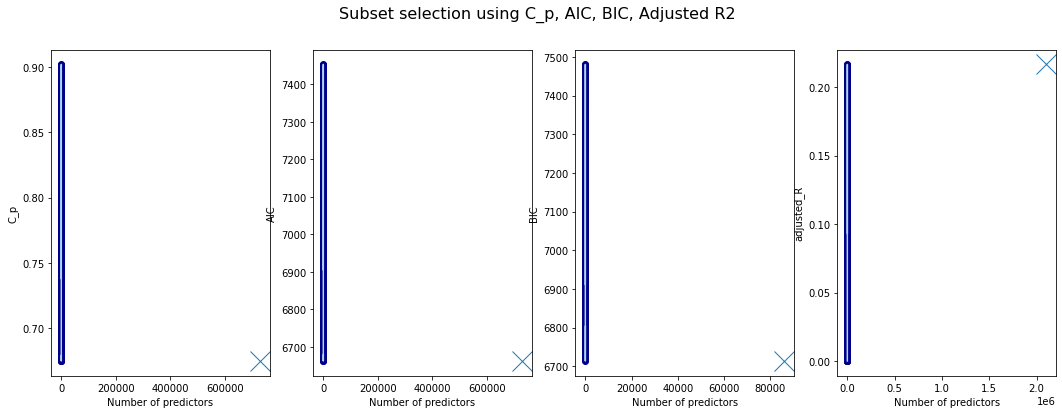

In [129]:
variables = ['C_p', 'AIC','BIC','adjusted_R']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df['numb_features'],df[v], color = 'lightblue')
    ax.scatter(df['numb_features'],df[v], color = 'darkblue')
    if v == 'adjusted_R':
        ax.plot(df[v].idxmax(),df[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df[v].idxmin(),df[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

### 3. Set a seed and estimate the test MSE using validation set. 10-fold CV and LOOCV for the general model in question 1 and the selected model in question2. Do you improve forecasts with the best subset approach?

In [130]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut

In [ ]:
# Generally for ml, set seed = 42
